# 02 - End-to-End Machine Learning Project

The goal of this exercise is to develop an understanding of the flow of a machine learning project from begining to end. In addition, this exercise is intended to provide an introduction to the most frequently used methods, when solving a ML-task. Since these projects are almost always structured the same way, we will go through it step by step.

<div class="alert alert-block alert-info"> This exercise requires basic skills in Python and working with Jupyter Notebooks. If you are not familiar with the two topics, take a look at the Python introduction notebook, which you can find in the Github-Repository of this course.<br><br>
To solve the following exercises it's also recommended to read the chapter 2 of the book in advance.</div>

**Task**: In this exercise, we want to predict the height of a person based on weight and gender. For this we need to load the dataset first. 

In [1]:
# Run this cell two import the following modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2 style="color:blue" align="left"> 1. Get the Data </h2>

The [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function loads the data from the CSV file into a pandas DataFrame. With [`DataFrame.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) the first five rows of the DataFrame are output.

In [2]:
df = pd.read_csv('dataset/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


As we can see, the dataset consists of 3 features. One row describes one person. The feature _Gender_ defines the sex of the respective person, the feature _Height_ defines the height measured in inches and the feature _Weight_ defines the weight measured in pounds. 

Before examining the data, we convert it to metric system so that the data will be more familiar to us.

### Converting to Metric System

In order not to overwrite the original data, the data set is copied to the variable `dataset`.

In [3]:
dataset = df.copy()

Now the first column to be converted is _Height_. To convert the data from inches to centimeters, the column must be multiplied by a factor of $2.54$.

In [4]:
conv_factor_height = 2.54
dataset['Height'] = df['Height'] * conv_factor_height
dataset.head()

,Gender,Height,Weight
0,Male,187.571423,241.893563
1,Male,174.706036,162.310473
2,Male,188.239668,212.740856
3,Male,182.196685,220.042470
4,Male,177.499761,206.349801


<div class="alert alert-block alert-success"><b>Task</b><br> 
    Convert the column <i>Height</i> from pounds to kilograms and save it in the <i>Height</i> column of the Dataframe dataset. Have a look on the exampe above.
</div>

In [5]:
# Write your code here
conv_factor_weight = 0.45359
dataset['Weight'] = df['Weight'] * conv_factor_weight
dataset.head()

,Gender,Height,Weight
0,Male,187.571423,109.720501
1,Male,174.706036,73.622407
2,Male,188.239668,96.497125
3,Male,182.196685,99.809064
4,Male,177.499761,93.598206


<h2 style="color:blue" align="left"> 2. Discover and Visualize the Data to Gain Insights </h2>

### Overview

To get a quick overview of the data, pandas offers many built-in functions.

The property [`DataFrame.shape`](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html) returns a tuple with the number of rows and columns of the DataFrame.

In [6]:
dataset.shape

(10000, 3)

The data set consists of a total of 10,000 datapoints.

The[`DataFrame.info()`]() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


The property [`DataFrame.dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)returns a Series with the data type of each column.

In [8]:
dataset.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

To see how many of the people in the dataset are male or female pandas provides the function [`DataFrame.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html). This method returns a Series containing counts of unique values.

In [9]:
dataset['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

We can see that there are as many women as men in the data set. This is very good, because otherwise the model would have a bias for one of the two genders.

### Barplot

This can also be solved graphically.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the <a href=https://seaborn.pydata.org/generated/seaborn.countplot.html>countplot()</a> method of the module seaborn to plot the count of Males and Females as barplot.
</div>

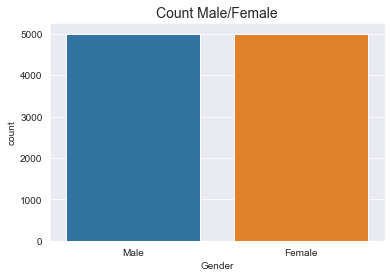

In [10]:
# Write your code here
sns.countplot(data=dataset, x='Gender')
plt.title('Count Male/Female', fontsize=14);

### Boxplot

Now that we have examined the number and distribution of the data, we can look at the measurements itself. Therefor pandas has a very useful built-in function, called [`DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). This generates some descriptive statistics of the data.

In [11]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.227731
std,9.772721,14.564067
min,137.828359,29.347330
25%,161.304276,61.605710
50%,168.447898,73.124572
75%,175.702625,84.898225
max,200.656806,122.464627


We see that the average height is 168 cm and the average weight is 73 kg. We can also see the min and max values for each measurment. This allows you to check the plausibility of the data at a glance. In addition we have the quantiles, which give you an overview over the disribution of the data.

All these statistics can be also seen in a boxplot. In the following you see the boxplot for the the Feature _Height_.

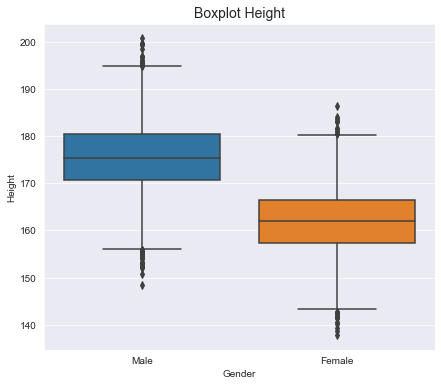

In [12]:
plt.figure(figsize=(7,6))
plt.title('Boxplot Height', fontsize=14);
sns.boxplot(x='Gender', y='Height', data=dataset);

<div class="alert alert-block alert-success"><b>Task</b><br> 
    Do the boxplot for the feature <i>Weight</i>.
</div>

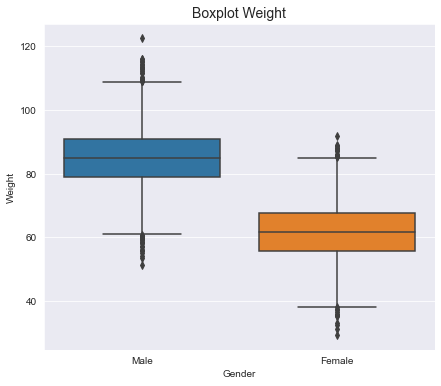

In [13]:
# Write Your Code Here
plt.figure(figsize=(7,6))
plt.title('Boxplot Weight', fontsize=14);
sns.boxplot(x='Gender', y='Weight', data=dataset);

### Histogram
Another good way to show the distribution of the data is to create the histograms.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Create the histogramms for the features weight and height in the dataset. The function used to create this kind of plot can be found in the second chapter of the book written by Géron.
</div>

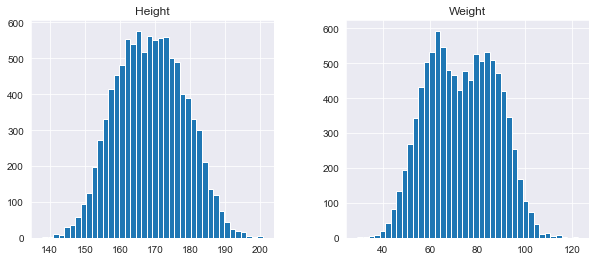

In [14]:
# Write Your Code Here
dataset.hist(bins=40, figsize=(10,4));

### Correlation Matrix

We used the last few cells to evaluate each feature individually. Now we can have a look at the correlations between the two features. For this purpose pandas provides the function [`DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). It computes the pairwise correlation of the columns.

In [15]:
dataset.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


As we can see, the correlation of weight and height is very good (>0.9). Because we have only two features, the matrix is very simple and easy to read. The more features the data set has, the larger the correlation matrix will be. Then it is useful to have a graphical representation of this matrix. 

<div class="alert alert-block alert-success"><b>Task</b><br> 
Visualize the correlation matrix using the function <a href=https://seaborn.pydata.org/generated/seaborn.heatmap.html>heatmap()</a> of seaborn. 
</div>

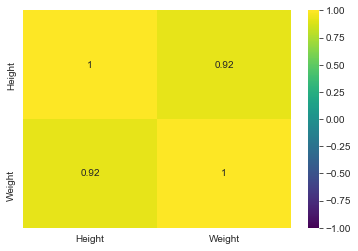

In [16]:
sns.heatmap(dataset.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1);

### Scatter plot

We can see in the correlation matrix, that there is a high positive correlation between the weight and the height of a person. To proof the relationship between this features we can plot each datapoint and see how they are distributed.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Create a scatter plot of the dataset. Plot the Height on the x-axis and the Width on the y-axis.
</div>

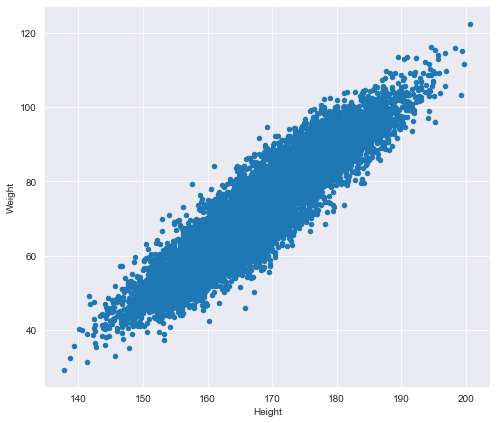

In [17]:
dataset.plot(figsize=(8,7), kind='scatter',x='Height',y='Weight');

We can see in the plot, that there is linear relationship between the weight and the height. This knowlegde can be used later.

It is also interesting to color the data points which belong to woman and men differently. Therefor the dataset is split up by genders.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Create a scatter plot of the dataset, where the datapoints are colored by their gender. Plot the Height on the x-axis and the Width on the y-axis.
</div>

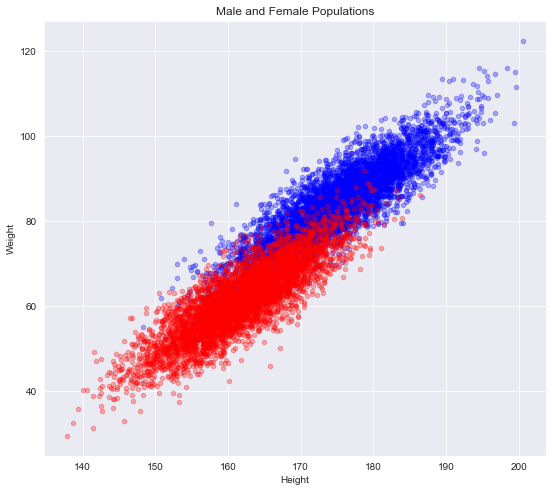

In [18]:
males=dataset[dataset['Gender']=='Male']
females=dataset[dataset['Gender']=='Female']
fig,ax = plt.subplots()
# Write Your Code Here
males.plot(figsize=(9,8), kind='scatter', x='Height', y='Weight', ax=ax, color='blue',alpha=0.3, title='Male and Female Distribution')
females.plot(figsize=(9,8), kind='scatter', x='Height', y='Weight', ax=ax, color='red', alpha=0.3, title='Male and Female Populations');

As we can see, the data points for men and women do not follow the same course. If we try to draw a straight line through the data for men and women, we find that the straight line for men is a bit steeper. This means, that it's important to train your model not only on the weights, but use the gender as feature in addition. 

<h2 style="color:blue" align="left"> 3. Prepare the Data for Machine Learning Algorithms </h2>

### Converting Categorical Variables to Numeric using OneHotEncoder

The Gender column is a text based feature. But most of the ML-algorithms can not deal with these kinds of data types. Therefor we have to transform into a interpretable features. Like in chapter 2 of the book, we use the `OneHotEncoder` of the module scikit-learn. 

In [19]:
from sklearn.preprocessing import OneHotEncoder

<div class="alert alert-block alert-success"><b>Task</b><br> 
Transform the Feature <i>Gender</i> into two new binary Features <i>Male</i> and <i>Female</i> and save it in the variable dataset_with_gender. Do not forget to drop the <i>Gender</i> column.
</div>

In [20]:
ohe = OneHotEncoder(dtype=int)
dataset_with_gender = dataset.copy()
# Write Your Code Here
dataset_with_gender[['Female','Male']] = ohe.fit_transform(dataset.drop(['Weight', 'Height'], axis=1)).toarray()
dataset_with_gender = dataset_with_gender.drop(['Gender'], axis=1)
dataset_with_gender.head()

,Height,Weight,Female,Male
0,187.571423,109.720501,0,1
1,174.706036,73.622407,0,1
2,188.239668,96.497125,0,1
3,182.196685,99.809064,0,1
4,177.499761,93.598206,0,1


### Replace Missing Values

In a real life dataset, you will often face missing data in the dataset you are using. In this dataset the data is complete, so we can feel lucky.

In [21]:
dataset_with_gender.isnull().sum()

Height    0
Weight    0
Female    0
Male      0
dtype: int64

### Train-Test-Split

In order to evaluate your trained model, we must spilt your dataset in a Train and Test-Set. Therefor we use the function [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from scikit-learn.

In [22]:
from sklearn.model_selection import train_test_split

In general, assigning 20% of the data to the test set is a good choise, but this depends in the number of datapoints. If you have small dataset, you take a smaller portion for the test set.

In [23]:
X = dataset_with_gender.drop('Height',axis=1)
y = dataset_with_gender['Height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['Female'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 3), (2000, 3), (8000,), (2000,))

`train_test_split()` splits the data into the two subsets randomly. This can make some troublesas the number of male and female datapoints can become imbalanced. This would lead to a bias for the respective gender, which is to be avoided.

In [24]:
X_train['Female'].value_counts()

0    4000
1    4000
Name: Female, dtype: int64

<div class="alert alert-block alert-success"><b>Task</b><br> 
Find a way to split the dataset with with a equal number of male and female datapoints in test and training set. Have a look in the second chapter of the book.
</div>

### Feature Scaling

Because we use features in different units of measurement, the data needs to be scaled. In this case, we use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from scikit-learn.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Use the StandardScaler sc to scale the datasets X_train and X_test and save the scaled data in the variables X_train_scaled and X_fit_scaled. It's important to fit the Scaler only ones.
</div>

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = []
X_test_scaled = []
# Write Your Code Here
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_train_scaled

array([[-0.77174146, -1.        ,  1.        ],
       [-1.17579686,  1.        , -1.        ],
       [ 1.95554812, -1.        ,  1.        ],
       ...,
       [-0.30379204,  1.        , -1.        ],
       [ 1.20856312, -1.        ,  1.        ],
       [ 0.13579082, -1.        ,  1.        ]])

<h2 style="color:blue" align="left"> 4. Select and Train a Model </h2>

### Linear Regression

After we have analyzed and prepared the data, we can now train our model. Since we have already shown a linear relationship between the height and the weight, we will use linear regression in this case. For this we will use the [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) of scikit-learn.

In [26]:
from sklearn.linear_model import LinearRegression

<div class="alert alert-block alert-success"><b>Task</b><br> 
Fit your model using the X_train_scaled and y_train. Evaluate the model with the X_test_scaled and y_test by computing the Mean Squared Error in the next cell. You can use the plot below to visualize your model.
</div>

In [27]:
lin_reg = LinearRegression()
# Write Your Code Here
lin_reg.fit(X_train_scaled, y_train);
y_pred = lin_reg.predict(X_test_scaled)
y_pred, y_test

(array([179.84897021, 163.64419381, 177.91721442, ..., 160.52598913,
        142.007439  , 158.22464048]),
 2919    178.710646
 5911    162.819113
 1631    179.464286
 9536    159.430907
 3486    174.834111
            ...    
 5598    160.312779
 3354    172.943276
 9744    160.477860
 9566    145.676856
 7313    155.424420
 Name: Height, Length: 2000, dtype: float64)

**Mean Squared Error**

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
# Write Your Code Here
np.sqrt(mean_squared_error(y_test,y_pred))

3.6891182082865064

**Plot Model**

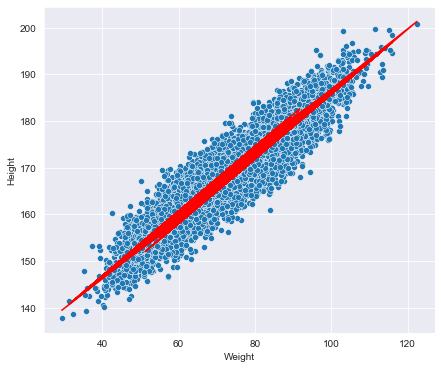

In [30]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=X_train, x='Weight', y=y_train);
plt.plot(X_train['Weight'], lin_reg.predict(X_train_scaled), c='r');

The red line represents your predicts of your model. As you can see, this is not a perfect line. This is because we do not trained your model on the two-dimensional dataset (Weight, Height), but on a four-dimesional data set (Weight, Height, Male, Femal). So the line of your model is a line thorugth a four-dimensional space. This plot is only the projection on the two-dimesional Height-Weight-plane.

In [31]:
X_train.head()
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)
print(Z)

[[-0.00982064 -0.0113957  -0.01319036 ... -0.01522953 -0.01319036
  -0.0113957 ]
 [-0.0113957  -0.01322338 -0.01530587 ... -0.01767209 -0.01530587
  -0.01322338]
 [-0.01319036 -0.01530587 -0.01771632 ... -0.02045518 -0.01771632
  -0.01530587]
 ...
 [-0.01200234 -0.01414685 -0.01660867 ...  0.02918791  0.03019517
   0.03085725]
 [-0.01097235 -0.01288301 -0.01507265 ...  0.01583738  0.01709512
   0.01804782]
 [-0.00988645 -0.01157475 -0.01350698 ...  0.00702321  0.0083816
   0.00947216]]


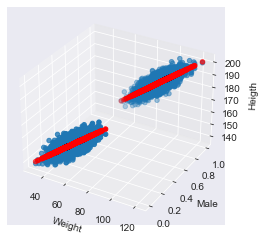

In [32]:
from mpl_toolkits.mplot3d import axes3d   

# Erstellen der Grafik
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot der Datenpunkte / Scatterplot
ax.scatter(X_train[['Weight']], X_train[['Male']], y_train)
ax.scatter(X_train[['Weight']], X_train[['Male']], lin_reg.predict(X_train_scaled), c='r')

# Beschriftung der Achsen
ax.set_xlabel('Weight')
ax.set_ylabel('Male')
ax.set_zlabel('Heigth')

plt.show()